In [18]:
from mypgm.base import RandomVar, Factor, ParametricDistribution, CPD
from mypgm.pgms import BayesianNetwork

In [10]:
R = RandomVar('R')
T = RandomVar('T', k=5, inf_sup=[-5,-1])
W = RandomVar('W', k=3, inf_sup=[100, 200])

In [11]:
from scipy.stats import poisson
poissonf_RW = Factor([R, W], distribution = ParametricDistribution(poisson, {'mu': lambda W: W/10 }))
# Visualize values as dataframe
poissonf_RW.to_dataframe()

,W=100,W=150,W=200
R,,,
0,0.000045,3.059023e-07,2.061154e-09
1,0.000454,4.588535e-06,4.122307e-08


In [12]:
poissonf_RW.values

array([4.53999298e-05, 3.05902321e-07, 2.06115362e-09, 4.53999298e-04,
       4.58853481e-06, 4.12230724e-08])

In [13]:
poissonf_RW.to_dataframe()

,W=100,W=150,W=200
R,,,
0,0.000045,3.059023e-07,2.061154e-09
1,0.000454,4.588535e-06,4.122307e-08


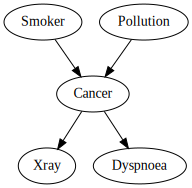

In [19]:
P = RandomVar('Pollution', 2)
S = RandomVar('Smoker', 2)
C = RandomVar('Cancer', 2)
X = RandomVar('Xray', 2)
D = RandomVar('Dyspnoea', 2)

cpd_poll = CPD([P], values=[[0.9], [0.1]])
cpd_smoke = CPD([S], values=[[0.3], [0.7]])
cpd_cancer = CPD([C, S, P], values=[0.03, 0.05, 0.001, 0.02, 0.97, 0.95, 0.999, 0.98])
cpd_xray = CPD([X, C], values=[0.9, 0.2, 0.1, 0.8])
cpd_dysp = CPD([D, C], values=[0.65, 0.3, 0.35, 0.7])

bn2 = BayesianNetwork([cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp])
# Visualize with graphviz
bn2.viz()